In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

### 1. Data

In [3]:
#df = pd.read_csv("data/data_regression.csv", index_col=0)
df = pd.read_csv("data/data_regression.csv", index_col=0)
df["profitability"] = df.gross / (df.budget + 1) # avoid budget = 0
df = df.drop([*df.select_dtypes(['object']).columns, "gross"], axis=1) # drop all the qualitative columns

In [4]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
director_rank                  int64
actor1_rank                    int64
a

In [5]:
not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
              "num_user_for_reviews"]

In [6]:
X = df.loc[:, ~df.columns.isin(not_include)]
y1 = df[["imdb_score"]]
y2 = df[["profitability"]]

In [7]:
X

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes,Biography,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0035423,123.0,446.0,821.0,20000.0,22209,1.0,48000000.0,1000.0,0,0,...,1,0,0,0,0,8,6,3,4,0.981155
tt0080339,88.0,104.0,318.0,628.0,2726,0.0,3500000.0,575.0,16000,0,...,0,0,0,0,0,8,2,3,4,23.828571
tt0080453,104.0,116.0,83.0,1000.0,1662,0.0,4500000.0,511.0,0,0,...,0,0,1,0,0,7,3,3,3,13.078468
tt0080455,148.0,644.0,326.0,1000.0,2566,1.0,27000000.0,809.0,14000,0,...,0,0,1,0,1,8,3,3,4,2.007407
tt0080487,98.0,11000.0,484.0,13000.0,14921,3.0,6000000.0,573.0,0,0,...,0,0,0,0,1,7,7,3,5,6.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt4438848,92.0,89.0,190.0,17000.0,17860,0.0,35000000.0,329.0,0,0,...,0,0,0,0,0,7,5,3,4,1.579766
tt4651520,100.0,24.0,851.0,15000.0,18786,9.0,20000000.0,1000.0,18000,0,...,0,0,0,0,0,7,5,5,5,2.773065
tt4667094,92.0,89.0,355.0,729.0,2848,4.0,5000000.0,706.0,11000,0,...,0,0,0,0,0,5,2,4,4,2.335036


In [8]:
X_stats = X.describe().transpose()
def norm(x):
    return (x - X_stats["mean"])/X_stats["std"]

normed_X = norm(X)

In [9]:
normed_X.keys()

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others',
       'director_rank', 'actor1_rank', 'actor2_rank', 'actor3_rank',
       'gross_budget_ratio'],
      dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

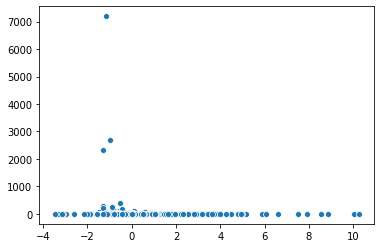

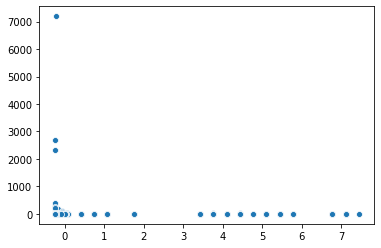

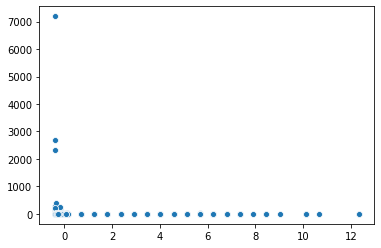

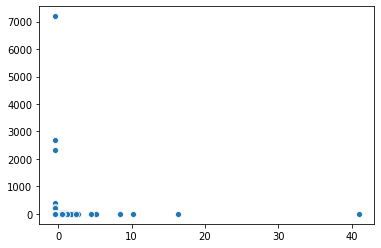

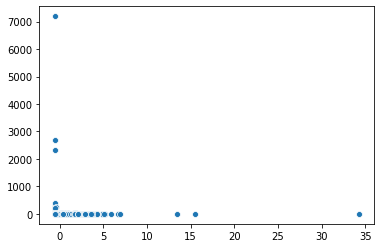

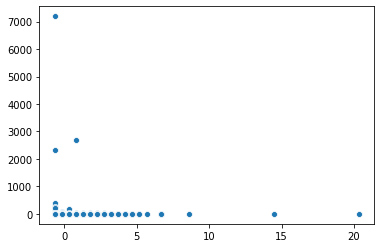

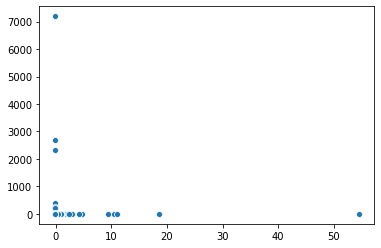

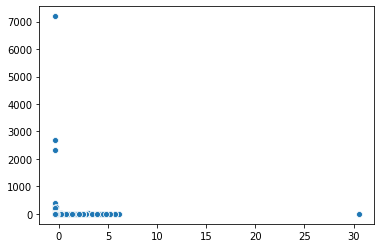

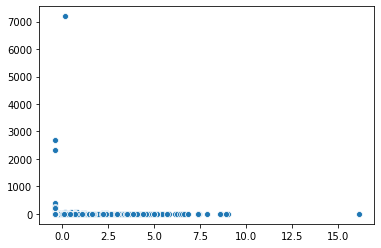

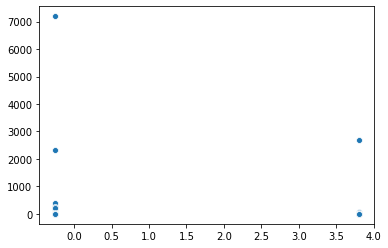

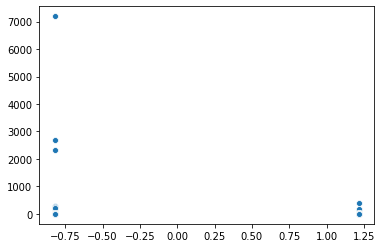

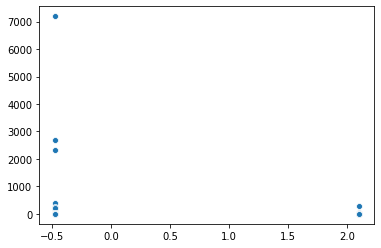

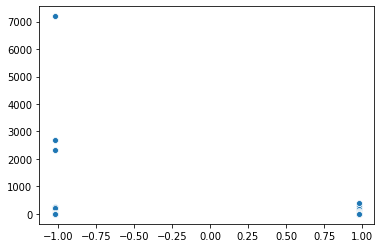

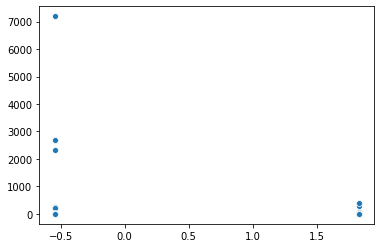

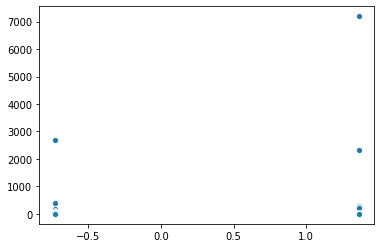

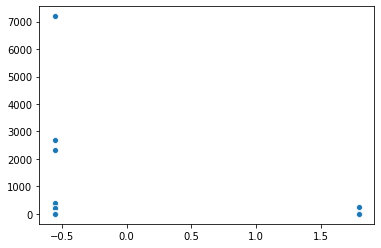

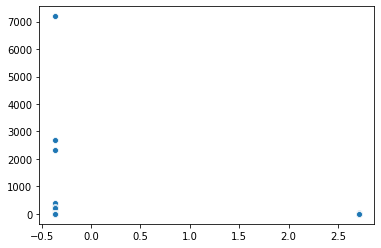

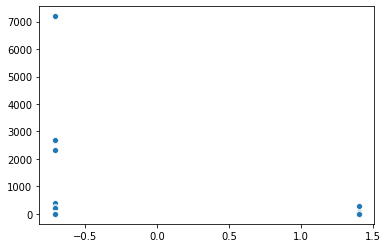

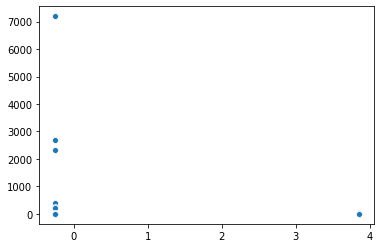

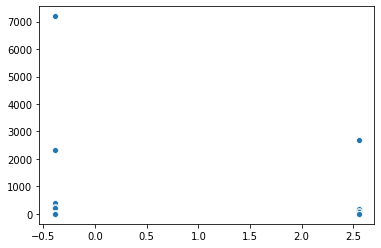

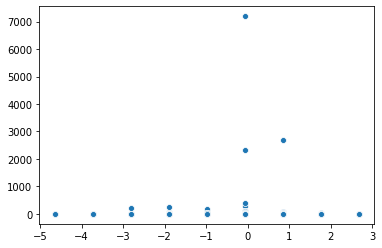

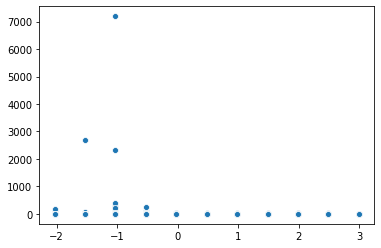

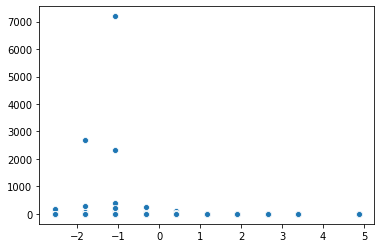

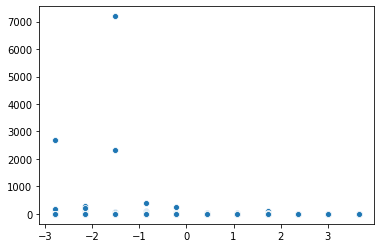

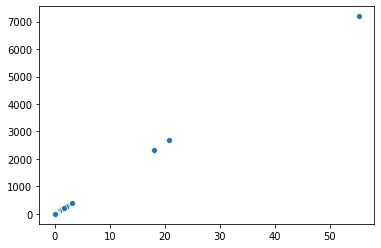

In [11]:
for x in normed_X.columns:
    sns.scatterplot(list(normed_X[x]), np.array(y2).reshape(y2.shape[0],))
    plt.show()

### 2. Predict IMDB Scores

In [12]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='relu'),
    tfkl.Dense(1)
])

In [13]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])

In [14]:
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2064 samples, validate on 516 samples
Epoch 1/500
2064/2064 [==============================] - 1s 284us/sample - loss: 37.0247 - mse: 37.0247 - mae: 5.9850 - val_loss: 35.9132 - val_mse: 35.9132 - val_mae: 5.8955
Epoch 2/500
2064/2064 [==============================] - 0s 26us/sample - loss: 35.4748 - mse: 35.4748 - mae: 5.8530 - val_loss: 34.4131 - val_mse: 34.4132 - val_mae: 5.7674
Epoch 3/500
2064/2064 [==============================] - 0s 25us/sample - loss: 33.9236 - mse: 33.9236 - mae: 5.7166 - val_loss: 32.8797 - val_mse: 32.8797 - val_mae: 5.6320
Epoch 4/500
2064/2064 [==============================] - 0s 26us/sample - loss: 32.3282 - mse: 32.3282 - mae: 5.5727 - val_loss: 31.3109 - val_mse: 31.3109 - val_mae: 5.4888
Epoch 5/500
2064/2064 [==============================] - 0s 23us/sample - loss: 30.7046 - mse: 30.7047 - mae: 5.4204 - val_loss: 29.6691 - val_mse: 29.6691 - val_mae: 5.3336
Epoch 6/500
2064/2064 [==============================] - 0s 26us/sample - loss: 29

2064/2064 [==============================] - 0s 24us/sample - loss: 1.5672 - mse: 1.5672 - mae: 0.8661 - val_loss: 2.8425 - val_mse: 2.8425 - val_mae: 0.8922
Epoch 49/500
2064/2064 [==============================] - 0s 24us/sample - loss: 1.5285 - mse: 1.5285 - mae: 0.8553 - val_loss: 2.7983 - val_mse: 2.7983 - val_mae: 0.8828
Epoch 50/500
2064/2064 [==============================] - 0s 23us/sample - loss: 1.4880 - mse: 1.4880 - mae: 0.8444 - val_loss: 2.7740 - val_mse: 2.7740 - val_mae: 0.8733
Epoch 51/500
2064/2064 [==============================] - 0s 23us/sample - loss: 1.4585 - mse: 1.4585 - mae: 0.8370 - val_loss: 2.7254 - val_mse: 2.7254 - val_mae: 0.8669
Epoch 52/500
2064/2064 [==============================] - 0s 24us/sample - loss: 1.4141 - mse: 1.4141 - mae: 0.8285 - val_loss: 2.7006 - val_mse: 2.7006 - val_mae: 0.8596
Epoch 53/500
2064/2064 [==============================] - 0s 51us/sample - loss: 1.3819 - mse: 1.3819 - mae: 0.8199 - val_loss: 2.6723 - val_mse: 2.6723 - val

Epoch 96/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.7954 - mse: 0.7954 - mae: 0.6657 - val_loss: 2.4385 - val_mse: 2.4385 - val_mae: 0.7374
Epoch 97/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.7888 - mse: 0.7888 - mae: 0.6638 - val_loss: 2.4436 - val_mse: 2.4436 - val_mae: 0.7359
Epoch 98/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.7828 - mse: 0.7828 - mae: 0.6618 - val_loss: 2.4435 - val_mse: 2.4435 - val_mae: 0.7340
Epoch 99/500
2064/2064 [==============================] - 0s 24us/sample - loss: 0.7758 - mse: 0.7758 - mae: 0.6599 - val_loss: 2.4565 - val_mse: 2.4565 - val_mae: 0.7325
Epoch 100/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.7700 - mse: 0.7700 - mae: 0.6581 - val_loss: 2.4620 - val_mse: 2.4620 - val_mae: 0.7311
Epoch 101/500
2064/2064 [==============================] - 0s 27us/sample - loss: 0.7639 - mse: 0.7639 - mae: 0.6552 - val_loss: 2.4779 - val_ms

Epoch 144/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.5673 - mse: 0.5673 - mae: 0.5753 - val_loss: 3.1219 - val_mse: 3.1219 - val_mae: 0.6704
Epoch 145/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.5635 - mse: 0.5635 - mae: 0.5733 - val_loss: 3.1336 - val_mse: 3.1336 - val_mae: 0.6692
Epoch 146/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.5608 - mse: 0.5608 - mae: 0.5729 - val_loss: 3.1521 - val_mse: 3.1521 - val_mae: 0.6679
Epoch 147/500
2064/2064 [==============================] - 0s 22us/sample - loss: 0.5566 - mse: 0.5566 - mae: 0.5702 - val_loss: 3.1829 - val_mse: 3.1829 - val_mae: 0.6671
Epoch 148/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.5536 - mse: 0.5536 - mae: 0.5678 - val_loss: 3.2102 - val_mse: 3.2102 - val_mae: 0.6665
Epoch 149/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.5503 - mse: 0.5503 - mae: 0.5666 - val_loss: 3.2271 - va

2064/2064 [==============================] - 0s 26us/sample - loss: 0.4425 - mse: 0.4425 - mae: 0.5094 - val_loss: 4.2976 - val_mse: 4.2976 - val_mae: 0.6282
Epoch 192/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.4408 - mse: 0.4408 - mae: 0.5082 - val_loss: 4.3274 - val_mse: 4.3274 - val_mae: 0.6259
Epoch 193/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.4386 - mse: 0.4386 - mae: 0.5067 - val_loss: 4.3529 - val_mse: 4.3529 - val_mae: 0.6258
Epoch 194/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.4369 - mse: 0.4369 - mae: 0.5057 - val_loss: 4.3958 - val_mse: 4.3958 - val_mae: 0.6261
Epoch 195/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.4354 - mse: 0.4354 - mae: 0.5055 - val_loss: 4.4109 - val_mse: 4.4109 - val_mae: 0.6247
Epoch 196/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.4331 - mse: 0.4331 - mae: 0.5037 - val_loss: 4.4371 - val_mse: 4.4371 

Epoch 239/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.3698 - mse: 0.3698 - mae: 0.4653 - val_loss: 5.7764 - val_mse: 5.7764 - val_mae: 0.6076
Epoch 240/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.3685 - mse: 0.3685 - mae: 0.4639 - val_loss: 5.8181 - val_mse: 5.8181 - val_mae: 0.6073
Epoch 241/500
2064/2064 [==============================] - 0s 26us/sample - loss: 0.3669 - mse: 0.3669 - mae: 0.4629 - val_loss: 5.8359 - val_mse: 5.8359 - val_mae: 0.6075
Epoch 242/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.3658 - mse: 0.3658 - mae: 0.4623 - val_loss: 5.8685 - val_mse: 5.8685 - val_mae: 0.6065
Epoch 243/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.3649 - mse: 0.3649 - mae: 0.4616 - val_loss: 5.8987 - val_mse: 5.8987 - val_mae: 0.6058
Epoch 244/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.3638 - mse: 0.3638 - mae: 0.4606 - val_loss: 5.9492 - va

2064/2064 [==============================] - 0s 20us/sample - loss: 0.3252 - mse: 0.3252 - mae: 0.4372 - val_loss: 7.2785 - val_mse: 7.2785 - val_mae: 0.6013
Epoch 287/500
2064/2064 [==============================] - 0s 26us/sample - loss: 0.3247 - mse: 0.3247 - mae: 0.4368 - val_loss: 7.2783 - val_mse: 7.2783 - val_mae: 0.5999
Epoch 288/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.3240 - mse: 0.3240 - mae: 0.4367 - val_loss: 7.3255 - val_mse: 7.3255 - val_mae: 0.6016
Epoch 289/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.3236 - mse: 0.3236 - mae: 0.4359 - val_loss: 7.3222 - val_mse: 7.3222 - val_mae: 0.6004
Epoch 290/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.3228 - mse: 0.3228 - mae: 0.4357 - val_loss: 7.3941 - val_mse: 7.3941 - val_mae: 0.6013
Epoch 291/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.3216 - mse: 0.3216 - mae: 0.4349 - val_loss: 7.3813 - val_mse: 7.3813 

Epoch 334/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.2966 - mse: 0.2966 - mae: 0.4182 - val_loss: 8.7165 - val_mse: 8.7165 - val_mae: 0.6045
Epoch 335/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.2964 - mse: 0.2964 - mae: 0.4172 - val_loss: 8.7183 - val_mse: 8.7183 - val_mae: 0.6036
Epoch 336/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2960 - mse: 0.2960 - mae: 0.4168 - val_loss: 8.7746 - val_mse: 8.7746 - val_mae: 0.6039
Epoch 337/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.2950 - mse: 0.2950 - mae: 0.4170 - val_loss: 8.7875 - val_mse: 8.7875 - val_mae: 0.6039
Epoch 338/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2946 - mse: 0.2946 - mae: 0.4168 - val_loss: 8.8634 - val_mse: 8.8634 - val_mae: 0.6060
Epoch 339/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.2943 - mse: 0.2943 - mae: 0.4159 - val_loss: 8.8455 - va

2064/2064 [==============================] - 0s 19us/sample - loss: 0.2766 - mse: 0.2766 - mae: 0.4031 - val_loss: 9.7888 - val_mse: 9.7888 - val_mae: 0.6076
Epoch 382/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.2763 - mse: 0.2763 - mae: 0.4029 - val_loss: 9.7786 - val_mse: 9.7786 - val_mae: 0.6072
Epoch 383/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2755 - mse: 0.2755 - mae: 0.4027 - val_loss: 9.8004 - val_mse: 9.8004 - val_mae: 0.6082
Epoch 384/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2753 - mse: 0.2753 - mae: 0.4025 - val_loss: 9.8099 - val_mse: 9.8099 - val_mae: 0.6068
Epoch 385/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.2751 - mse: 0.2751 - mae: 0.4021 - val_loss: 9.8660 - val_mse: 9.8660 - val_mae: 0.6080
Epoch 386/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2748 - mse: 0.2748 - mae: 0.4019 - val_loss: 9.8582 - val_mse: 9.8582 

2064/2064 [==============================] - 0s 19us/sample - loss: 0.2616 - mse: 0.2616 - mae: 0.3917 - val_loss: 10.8320 - val_mse: 10.8320 - val_mae: 0.6132
Epoch 429/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.2613 - mse: 0.2613 - mae: 0.3915 - val_loss: 10.8963 - val_mse: 10.8963 - val_mae: 0.6141
Epoch 430/500
2064/2064 [==============================] - 0s 25us/sample - loss: 0.2612 - mse: 0.2612 - mae: 0.3919 - val_loss: 10.8781 - val_mse: 10.8781 - val_mae: 0.6141
Epoch 431/500
2064/2064 [==============================] - 0s 20us/sample - loss: 0.2604 - mse: 0.2604 - mae: 0.3910 - val_loss: 10.9387 - val_mse: 10.9387 - val_mae: 0.6143
Epoch 432/500
2064/2064 [==============================] - 0s 22us/sample - loss: 0.2602 - mse: 0.2602 - mae: 0.3907 - val_loss: 10.9086 - val_mse: 10.9086 - val_mae: 0.6129
Epoch 433/500
2064/2064 [==============================] - 0s 19us/sample - loss: 0.2602 - mse: 0.2602 - mae: 0.3905 - val_loss: 10.8947 - val_m

2064/2064 [==============================] - 0s 24us/sample - loss: 0.2495 - mse: 0.2495 - mae: 0.3818 - val_loss: 11.7559 - val_mse: 11.7559 - val_mae: 0.6186
Epoch 476/500
2064/2064 [==============================] - 0s 24us/sample - loss: 0.2491 - mse: 0.2491 - mae: 0.3823 - val_loss: 11.7907 - val_mse: 11.7907 - val_mae: 0.6193
Epoch 477/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.2487 - mse: 0.2487 - mae: 0.3814 - val_loss: 11.7982 - val_mse: 11.7982 - val_mae: 0.6185
Epoch 478/500
2064/2064 [==============================] - 0s 26us/sample - loss: 0.2490 - mse: 0.2490 - mae: 0.3824 - val_loss: 11.8252 - val_mse: 11.8252 - val_mae: 0.6206
Epoch 479/500
2064/2064 [==============================] - 0s 21us/sample - loss: 0.2485 - mse: 0.2485 - mae: 0.3810 - val_loss: 11.8247 - val_mse: 11.8247 - val_mae: 0.6191
Epoch 480/500
2064/2064 [==============================] - 0s 23us/sample - loss: 0.2484 - mse: 0.2484 - mae: 0.3815 - val_loss: 11.8733 - val_m

In [15]:
preds = model.predict(np.array(X_test)).flatten()

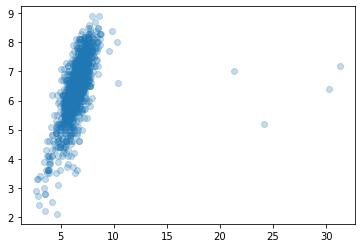

In [16]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25) # some correlations going on here but definitely not linear

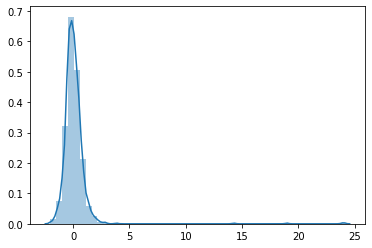

In [17]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!

### 3. Predict Profitability

#### 3.1. Traditional neural network predicting log profitability

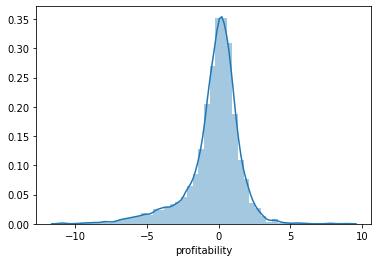

In [18]:
sns.distplot(np.log(df["profitability"]))

In [19]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
director_rank                  int64
actor1_rank                    int64
a

In [20]:
df_cut = df[df.profitability < 5]

In [21]:
X_cut = X[df.profitability < 5]

In [22]:
X_cut.shape, X.shape

((3541, 25), (3852, 25))

In [23]:
# not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
#               "num_user_for_reviews"]
# X = 
normed_X_cut = norm(X_cut)
y2 = np.log(df[df["profitability"] < 5].profitability)

In [24]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y2, test_size=0.33, random_state=42)

In [27]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=128, 
          epochs=1000, workers=10, use_multiprocessing=True)

Train on 1897 samples, validate on 475 samples
Epoch 1/1000
1897/1897 [==============================] - 0s 262us/sample - loss: 3.1868 - mse: 3.1868 - mae: 1.2523 - val_loss: 2.4069 - val_mse: 2.4069 - val_mae: 1.1320
Epoch 2/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 2.6592 - mse: 2.6592 - mae: 1.1757 - val_loss: 2.2190 - val_mse: 2.2190 - val_mae: 1.0889
Epoch 3/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 2.5265 - mse: 2.5265 - mae: 1.1164 - val_loss: 2.1504 - val_mse: 2.1504 - val_mae: 1.0578
Epoch 4/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 2.4680 - mse: 2.4680 - mae: 1.1008 - val_loss: 2.1329 - val_mse: 2.1329 - val_mae: 1.0739
Epoch 5/1000
1897/1897 [==============================] - 0s 27us/sample - loss: 2.4163 - mse: 2.4163 - mae: 1.0984 - val_loss: 2.1105 - val_mse: 2.1105 - val_mae: 1.0590
Epoch 6/1000
1897/1897 [==============================] - 0s 27us/sample - loss: 2.3904 - mse: 2.

1897/1897 [==============================] - 0s 41us/sample - loss: 1.0885 - mse: 1.0885 - mae: 0.7136 - val_loss: 1.8187 - val_mse: 1.8187 - val_mae: 0.9564
Epoch 49/1000
1897/1897 [==============================] - 0s 34us/sample - loss: 1.0724 - mse: 1.0724 - mae: 0.7393 - val_loss: 1.7978 - val_mse: 1.7978 - val_mae: 0.9530
Epoch 50/1000
1897/1897 [==============================] - 0s 30us/sample - loss: 1.0591 - mse: 1.0591 - mae: 0.7304 - val_loss: 1.8150 - val_mse: 1.8150 - val_mae: 0.9174
Epoch 51/1000
1897/1897 [==============================] - 0s 29us/sample - loss: 1.0453 - mse: 1.0453 - mae: 0.7249 - val_loss: 1.7590 - val_mse: 1.7590 - val_mae: 0.9296
Epoch 52/1000
1897/1897 [==============================] - 0s 27us/sample - loss: 1.0317 - mse: 1.0317 - mae: 0.7096 - val_loss: 1.7216 - val_mse: 1.7216 - val_mae: 0.9199
Epoch 53/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 1.0191 - mse: 1.0191 - mae: 0.7218 - val_loss: 1.7882 - val_mse: 1.7882 

Epoch 96/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.5920 - mse: 0.5920 - mae: 0.5524 - val_loss: 1.5391 - val_mse: 1.5391 - val_mae: 0.8592
Epoch 97/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.5809 - mse: 0.5809 - mae: 0.5438 - val_loss: 1.6389 - val_mse: 1.6389 - val_mae: 0.8909
Epoch 98/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.6787 - mse: 0.6787 - mae: 0.6028 - val_loss: 1.5780 - val_mse: 1.5780 - val_mae: 0.8624
Epoch 99/1000
1897/1897 [==============================] - 0s 52us/sample - loss: 0.6664 - mse: 0.6664 - mae: 0.5868 - val_loss: 1.6751 - val_mse: 1.6751 - val_mae: 0.9125
Epoch 100/1000
1897/1897 [==============================] - 0s 39us/sample - loss: 0.6255 - mse: 0.6255 - mae: 0.5641 - val_loss: 1.4984 - val_mse: 1.4984 - val_mae: 0.8568
Epoch 101/1000
1897/1897 [==============================] - 0s 43us/sample - loss: 0.5225 - mse: 0.5225 - mae: 0.4986 - val_loss: 1.6662 - 

1897/1897 [==============================] - 0s 22us/sample - loss: 0.4505 - mse: 0.4505 - mae: 0.4878 - val_loss: 1.6352 - val_mse: 1.6352 - val_mae: 0.8779
Epoch 144/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.4163 - mse: 0.4163 - mae: 0.4580 - val_loss: 1.7029 - val_mse: 1.7029 - val_mae: 0.9005
Epoch 145/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.4318 - mse: 0.4318 - mae: 0.4634 - val_loss: 1.6892 - val_mse: 1.6892 - val_mae: 0.8863
Epoch 146/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.4658 - mse: 0.4658 - mae: 0.4874 - val_loss: 1.6506 - val_mse: 1.6506 - val_mae: 0.9094
Epoch 147/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.4151 - mse: 0.4151 - mae: 0.4608 - val_loss: 1.7513 - val_mse: 1.7513 - val_mae: 0.8879
Epoch 148/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.4290 - mse: 0.4290 - mae: 0.4543 - val_loss: 1.6333 - val_mse: 1.

1897/1897 [==============================] - 0s 22us/sample - loss: 0.3097 - mse: 0.3097 - mae: 0.3973 - val_loss: 1.7874 - val_mse: 1.7874 - val_mae: 0.9329
Epoch 191/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.3555 - mse: 0.3555 - mae: 0.4266 - val_loss: 1.7847 - val_mse: 1.7847 - val_mae: 0.9058
Epoch 192/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.3314 - mse: 0.3314 - mae: 0.4125 - val_loss: 1.7643 - val_mse: 1.7643 - val_mae: 0.9331
Epoch 193/1000
1897/1897 [==============================] - 0s 27us/sample - loss: 0.3618 - mse: 0.3618 - mae: 0.4347 - val_loss: 1.7362 - val_mse: 1.7362 - val_mae: 0.9047
Epoch 194/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.3633 - mse: 0.3633 - mae: 0.4360 - val_loss: 1.9322 - val_mse: 1.9322 - val_mae: 0.9688
Epoch 195/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.3678 - mse: 0.3678 - mae: 0.4425 - val_loss: 1.8790 - val_mse: 1.

1897/1897 [==============================] - 0s 44us/sample - loss: 0.2580 - mse: 0.2580 - mae: 0.3611 - val_loss: 1.9910 - val_mse: 1.9910 - val_mae: 0.9279
Epoch 238/1000
1897/1897 [==============================] - 0s 53us/sample - loss: 0.2573 - mse: 0.2573 - mae: 0.3618 - val_loss: 1.8158 - val_mse: 1.8158 - val_mae: 0.9157
Epoch 239/1000
1897/1897 [==============================] - 0s 36us/sample - loss: 0.2541 - mse: 0.2541 - mae: 0.3577 - val_loss: 1.9101 - val_mse: 1.9101 - val_mae: 0.9222
Epoch 240/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.2736 - mse: 0.2736 - mae: 0.3779 - val_loss: 1.9133 - val_mse: 1.9133 - val_mae: 0.9714
Epoch 241/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.3101 - mse: 0.3101 - mae: 0.4172 - val_loss: 1.9913 - val_mse: 1.9913 - val_mae: 1.0109
Epoch 242/1000
1897/1897 [==============================] - 0s 31us/sample - loss: 0.2770 - mse: 0.2770 - mae: 0.3742 - val_loss: 1.8784 - val_mse: 1.

1897/1897 [==============================] - 0s 28us/sample - loss: 0.2180 - mse: 0.2180 - mae: 0.3352 - val_loss: 2.0128 - val_mse: 2.0128 - val_mae: 0.9458
Epoch 285/1000
1897/1897 [==============================] - 0s 33us/sample - loss: 0.2275 - mse: 0.2275 - mae: 0.3384 - val_loss: 2.0128 - val_mse: 2.0128 - val_mae: 0.9566
Epoch 286/1000
1897/1897 [==============================] - 0s 43us/sample - loss: 0.2183 - mse: 0.2183 - mae: 0.3366 - val_loss: 1.9981 - val_mse: 1.9981 - val_mae: 0.9904
Epoch 287/1000
1897/1897 [==============================] - 0s 44us/sample - loss: 0.2430 - mse: 0.2430 - mae: 0.3549 - val_loss: 1.9624 - val_mse: 1.9624 - val_mae: 0.9449
Epoch 288/1000
1897/1897 [==============================] - 0s 43us/sample - loss: 0.2469 - mse: 0.2469 - mae: 0.3650 - val_loss: 1.9719 - val_mse: 1.9719 - val_mae: 0.9567
Epoch 289/1000
1897/1897 [==============================] - 0s 35us/sample - loss: 0.2008 - mse: 0.2008 - mae: 0.3222 - val_loss: 1.9890 - val_mse: 1.

1897/1897 [==============================] - 0s 23us/sample - loss: 0.2070 - mse: 0.2070 - mae: 0.3335 - val_loss: 2.0472 - val_mse: 2.0472 - val_mae: 0.9637
Epoch 332/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1877 - mse: 0.1877 - mae: 0.3164 - val_loss: 2.1127 - val_mse: 2.1127 - val_mae: 0.9803
Epoch 333/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.2193 - mse: 0.2193 - mae: 0.3491 - val_loss: 2.1442 - val_mse: 2.1442 - val_mae: 0.9791
Epoch 334/1000
1897/1897 [==============================] - 0s 20us/sample - loss: 0.2102 - mse: 0.2102 - mae: 0.3363 - val_loss: 2.0059 - val_mse: 2.0059 - val_mae: 0.9395
Epoch 335/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1875 - mse: 0.1875 - mae: 0.3157 - val_loss: 2.0501 - val_mse: 2.0501 - val_mae: 0.9549
Epoch 336/1000
1897/1897 [==============================] - 0s 28us/sample - loss: 0.1858 - mse: 0.1858 - mae: 0.3121 - val_loss: 2.0491 - val_mse: 2.

1897/1897 [==============================] - 0s 23us/sample - loss: 0.1667 - mse: 0.1667 - mae: 0.2991 - val_loss: 1.9615 - val_mse: 1.9615 - val_mae: 0.9517
Epoch 379/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.1538 - mse: 0.1538 - mae: 0.2803 - val_loss: 1.9951 - val_mse: 1.9951 - val_mae: 0.9497
Epoch 380/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1674 - mse: 0.1674 - mae: 0.2986 - val_loss: 1.8698 - val_mse: 1.8698 - val_mae: 0.9393
Epoch 381/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.1563 - mse: 0.1563 - mae: 0.2871 - val_loss: 2.0529 - val_mse: 2.0529 - val_mae: 0.9703
Epoch 382/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.1986 - mse: 0.1986 - mae: 0.3335 - val_loss: 2.0283 - val_mse: 2.0283 - val_mae: 0.9699
Epoch 383/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.1977 - mse: 0.1977 - mae: 0.3350 - val_loss: 2.0701 - val_mse: 2.

1897/1897 [==============================] - 0s 21us/sample - loss: 0.1321 - mse: 0.1321 - mae: 0.2659 - val_loss: 1.9438 - val_mse: 1.9438 - val_mae: 0.9496
Epoch 426/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.1347 - mse: 0.1347 - mae: 0.2653 - val_loss: 1.9873 - val_mse: 1.9873 - val_mae: 0.9639
Epoch 427/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1283 - mse: 0.1283 - mae: 0.2616 - val_loss: 1.9512 - val_mse: 1.9512 - val_mae: 0.9498
Epoch 428/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.1339 - mse: 0.1339 - mae: 0.2644 - val_loss: 1.9228 - val_mse: 1.9228 - val_mae: 0.9529
Epoch 429/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.1265 - mse: 0.1265 - mae: 0.2546 - val_loss: 1.9809 - val_mse: 1.9809 - val_mae: 0.9782
Epoch 430/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1408 - mse: 0.1408 - mae: 0.2741 - val_loss: 1.9318 - val_mse: 1.

1897/1897 [==============================] - 0s 22us/sample - loss: 0.1776 - mse: 0.1776 - mae: 0.3214 - val_loss: 2.1068 - val_mse: 2.1068 - val_mae: 1.0214
Epoch 473/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1741 - mse: 0.1741 - mae: 0.3170 - val_loss: 1.9738 - val_mse: 1.9738 - val_mae: 0.9824
Epoch 474/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1457 - mse: 0.1457 - mae: 0.2852 - val_loss: 1.9555 - val_mse: 1.9555 - val_mae: 0.9717
Epoch 475/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1665 - mse: 0.1665 - mae: 0.3018 - val_loss: 2.0581 - val_mse: 2.0581 - val_mae: 0.9932
Epoch 476/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1727 - mse: 0.1727 - mae: 0.3188 - val_loss: 2.1425 - val_mse: 2.1425 - val_mae: 1.0169
Epoch 477/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.1324 - mse: 0.1324 - mae: 0.2681 - val_loss: 1.9750 - val_mse: 1.

1897/1897 [==============================] - 0s 25us/sample - loss: 0.1189 - mse: 0.1189 - mae: 0.2592 - val_loss: 2.0407 - val_mse: 2.0407 - val_mae: 0.9812
Epoch 520/1000
1897/1897 [==============================] - 0s 28us/sample - loss: 0.1195 - mse: 0.1195 - mae: 0.2532 - val_loss: 1.9748 - val_mse: 1.9748 - val_mae: 0.9841
Epoch 521/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.1258 - mse: 0.1258 - mae: 0.2567 - val_loss: 2.1597 - val_mse: 2.1597 - val_mae: 1.0174
Epoch 522/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.1285 - mse: 0.1285 - mae: 0.2694 - val_loss: 2.0796 - val_mse: 2.0796 - val_mae: 0.9869
Epoch 523/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.1176 - mse: 0.1176 - mae: 0.2554 - val_loss: 1.9635 - val_mse: 1.9635 - val_mae: 0.9660
Epoch 524/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.1305 - mse: 0.1305 - mae: 0.2701 - val_loss: 2.0404 - val_mse: 2.

1897/1897 [==============================] - 0s 23us/sample - loss: 0.0967 - mse: 0.0967 - mae: 0.2306 - val_loss: 1.9717 - val_mse: 1.9717 - val_mae: 0.9852
Epoch 567/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0889 - mse: 0.0889 - mae: 0.2227 - val_loss: 2.0596 - val_mse: 2.0596 - val_mae: 0.9828
Epoch 568/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.0877 - mse: 0.0877 - mae: 0.2124 - val_loss: 1.9875 - val_mse: 1.9875 - val_mae: 0.9833
Epoch 569/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0919 - mse: 0.0919 - mae: 0.2258 - val_loss: 2.0717 - val_mse: 2.0717 - val_mae: 1.0030
Epoch 570/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1077 - mse: 0.1077 - mae: 0.2461 - val_loss: 2.0079 - val_mse: 2.0079 - val_mae: 0.9803
Epoch 571/1000
1897/1897 [==============================] - 0s 20us/sample - loss: 0.1328 - mse: 0.1328 - mae: 0.2739 - val_loss: 2.0816 - val_mse: 2.

1897/1897 [==============================] - 0s 21us/sample - loss: 0.1093 - mse: 0.1093 - mae: 0.2510 - val_loss: 2.0888 - val_mse: 2.0888 - val_mae: 1.0029
Epoch 614/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.1143 - mse: 0.1143 - mae: 0.2510 - val_loss: 2.0269 - val_mse: 2.0269 - val_mae: 1.0158
Epoch 615/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1338 - mse: 0.1338 - mae: 0.2765 - val_loss: 2.0632 - val_mse: 2.0632 - val_mae: 0.9916
Epoch 616/1000
1897/1897 [==============================] - 0s 20us/sample - loss: 0.1684 - mse: 0.1684 - mae: 0.3055 - val_loss: 2.0707 - val_mse: 2.0707 - val_mae: 0.9838
Epoch 617/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.1344 - mse: 0.1344 - mae: 0.2788 - val_loss: 1.9982 - val_mse: 1.9982 - val_mae: 0.9865
Epoch 618/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1354 - mse: 0.1354 - mae: 0.2804 - val_loss: 2.0062 - val_mse: 2.

1897/1897 [==============================] - 0s 20us/sample - loss: 0.0665 - mse: 0.0665 - mae: 0.1859 - val_loss: 1.9989 - val_mse: 1.9989 - val_mae: 0.9964
Epoch 661/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0603 - mse: 0.0603 - mae: 0.1773 - val_loss: 2.0208 - val_mse: 2.0208 - val_mae: 0.9815
Epoch 662/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0637 - mse: 0.0637 - mae: 0.1835 - val_loss: 2.0666 - val_mse: 2.0666 - val_mae: 1.0110
Epoch 663/1000
1897/1897 [==============================] - 0s 20us/sample - loss: 0.0725 - mse: 0.0725 - mae: 0.2012 - val_loss: 2.0427 - val_mse: 2.0427 - val_mae: 0.9894
Epoch 664/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0828 - mse: 0.0828 - mae: 0.2164 - val_loss: 1.9863 - val_mse: 1.9863 - val_mae: 0.9817
Epoch 665/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0609 - mse: 0.0609 - mae: 0.1799 - val_loss: 1.9745 - val_mse: 1.

1897/1897 [==============================] - 0s 21us/sample - loss: 0.0773 - mse: 0.0773 - mae: 0.2055 - val_loss: 2.1296 - val_mse: 2.1296 - val_mae: 1.0130
Epoch 708/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0764 - mse: 0.0764 - mae: 0.2057 - val_loss: 2.0045 - val_mse: 2.0045 - val_mae: 0.9889
Epoch 709/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0721 - mse: 0.0721 - mae: 0.1967 - val_loss: 2.0879 - val_mse: 2.0879 - val_mae: 1.0195
Epoch 710/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.0852 - mse: 0.0852 - mae: 0.2229 - val_loss: 2.1957 - val_mse: 2.1957 - val_mae: 1.0320
Epoch 711/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0907 - mse: 0.0907 - mae: 0.2270 - val_loss: 2.0825 - val_mse: 2.0825 - val_mae: 1.0093
Epoch 712/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.1002 - mse: 0.1002 - mae: 0.2395 - val_loss: 2.0505 - val_mse: 2.

1897/1897 [==============================] - 0s 23us/sample - loss: 0.0724 - mse: 0.0724 - mae: 0.2017 - val_loss: 2.1321 - val_mse: 2.1321 - val_mae: 1.0267
Epoch 755/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0671 - mse: 0.0671 - mae: 0.1932 - val_loss: 2.1491 - val_mse: 2.1491 - val_mae: 1.0213
Epoch 756/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0801 - mse: 0.0801 - mae: 0.2121 - val_loss: 2.0181 - val_mse: 2.0181 - val_mae: 1.0038
Epoch 757/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.0937 - mse: 0.0937 - mae: 0.2346 - val_loss: 2.0614 - val_mse: 2.0614 - val_mae: 1.0156
Epoch 758/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0806 - mse: 0.0806 - mae: 0.2131 - val_loss: 2.1130 - val_mse: 2.1130 - val_mae: 1.0022
Epoch 759/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0889 - mse: 0.0889 - mae: 0.2251 - val_loss: 2.0261 - val_mse: 2.

1897/1897 [==============================] - 0s 21us/sample - loss: 0.0680 - mse: 0.0680 - mae: 0.1935 - val_loss: 2.0650 - val_mse: 2.0650 - val_mae: 1.0133
Epoch 802/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0642 - mse: 0.0642 - mae: 0.1869 - val_loss: 2.0264 - val_mse: 2.0264 - val_mae: 1.0008
Epoch 803/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0574 - mse: 0.0574 - mae: 0.1774 - val_loss: 2.0711 - val_mse: 2.0711 - val_mae: 1.0000
Epoch 804/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.0546 - mse: 0.0546 - mae: 0.1704 - val_loss: 1.9860 - val_mse: 1.9860 - val_mae: 0.9909
Epoch 805/1000
1897/1897 [==============================] - 0s 21us/sample - loss: 0.0540 - mse: 0.0540 - mae: 0.1701 - val_loss: 2.0581 - val_mse: 2.0581 - val_mae: 1.0099
Epoch 806/1000
1897/1897 [==============================] - 0s 22us/sample - loss: 0.0595 - mse: 0.0595 - mae: 0.1834 - val_loss: 2.1220 - val_mse: 2.

1897/1897 [==============================] - 0s 47us/sample - loss: 0.0536 - mse: 0.0536 - mae: 0.1709 - val_loss: 2.0360 - val_mse: 2.0360 - val_mae: 1.0023
Epoch 849/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0432 - mse: 0.0432 - mae: 0.1510 - val_loss: 2.0338 - val_mse: 2.0338 - val_mae: 1.0039
Epoch 850/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.0389 - mse: 0.0389 - mae: 0.1407 - val_loss: 2.0874 - val_mse: 2.0874 - val_mae: 1.0101
Epoch 851/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0519 - mse: 0.0519 - mae: 0.1679 - val_loss: 2.1140 - val_mse: 2.1140 - val_mae: 1.0226
Epoch 852/1000
1897/1897 [==============================] - 0s 30us/sample - loss: 0.0605 - mse: 0.0605 - mae: 0.1846 - val_loss: 2.1291 - val_mse: 2.1291 - val_mae: 1.0257
Epoch 853/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0547 - mse: 0.0547 - mae: 0.1706 - val_loss: 2.1046 - val_mse: 2.

1897/1897 [==============================] - 0s 22us/sample - loss: 0.0719 - mse: 0.0719 - mae: 0.2025 - val_loss: 2.1764 - val_mse: 2.1764 - val_mae: 1.0331
Epoch 896/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0769 - mse: 0.0769 - mae: 0.2058 - val_loss: 2.0730 - val_mse: 2.0730 - val_mae: 1.0147
Epoch 897/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0872 - mse: 0.0872 - mae: 0.2246 - val_loss: 2.0083 - val_mse: 2.0083 - val_mae: 1.0107
Epoch 898/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0625 - mse: 0.0625 - mae: 0.1887 - val_loss: 2.0790 - val_mse: 2.0790 - val_mae: 1.0031
Epoch 899/1000
1897/1897 [==============================] - 0s 29us/sample - loss: 0.0545 - mse: 0.0545 - mae: 0.1721 - val_loss: 2.0249 - val_mse: 2.0249 - val_mae: 1.0005
Epoch 900/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0416 - mse: 0.0416 - mae: 0.1507 - val_loss: 2.0804 - val_mse: 2.

1897/1897 [==============================] - 0s 30us/sample - loss: 0.0423 - mse: 0.0423 - mae: 0.1487 - val_loss: 2.0994 - val_mse: 2.0994 - val_mae: 1.0135
Epoch 943/1000
1897/1897 [==============================] - 0s 31us/sample - loss: 0.0430 - mse: 0.0430 - mae: 0.1502 - val_loss: 2.0646 - val_mse: 2.0646 - val_mae: 1.0182
Epoch 944/1000
1897/1897 [==============================] - 0s 25us/sample - loss: 0.0423 - mse: 0.0423 - mae: 0.1540 - val_loss: 2.1708 - val_mse: 2.1708 - val_mae: 1.0308
Epoch 945/1000
1897/1897 [==============================] - 0s 23us/sample - loss: 0.0529 - mse: 0.0529 - mae: 0.1746 - val_loss: 2.1088 - val_mse: 2.1088 - val_mae: 1.0171
Epoch 946/1000
1897/1897 [==============================] - 0s 24us/sample - loss: 0.0485 - mse: 0.0485 - mae: 0.1623 - val_loss: 2.0867 - val_mse: 2.0867 - val_mae: 1.0223
Epoch 947/1000
1897/1897 [==============================] - 0s 28us/sample - loss: 0.0517 - mse: 0.0517 - mae: 0.1679 - val_loss: 2.0793 - val_mse: 2.

1897/1897 [==============================] - 0s 30us/sample - loss: 0.0680 - mse: 0.0680 - mae: 0.1986 - val_loss: 2.0864 - val_mse: 2.0864 - val_mae: 1.0070
Epoch 990/1000
1897/1897 [==============================] - 0s 27us/sample - loss: 0.0712 - mse: 0.0712 - mae: 0.2015 - val_loss: 1.9872 - val_mse: 1.9872 - val_mae: 1.0062
Epoch 991/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0612 - mse: 0.0612 - mae: 0.1875 - val_loss: 2.0681 - val_mse: 2.0681 - val_mae: 1.0121
Epoch 992/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0534 - mse: 0.0534 - mae: 0.1744 - val_loss: 2.0283 - val_mse: 2.0283 - val_mae: 1.0047
Epoch 993/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0515 - mse: 0.0515 - mae: 0.1708 - val_loss: 2.0597 - val_mse: 2.0597 - val_mae: 1.0182
Epoch 994/1000
1897/1897 [==============================] - 0s 26us/sample - loss: 0.0445 - mse: 0.0445 - mae: 0.1612 - val_loss: 2.1147 - val_mse: 2.

In [28]:
preds2 = model2.predict(X_test).flatten()

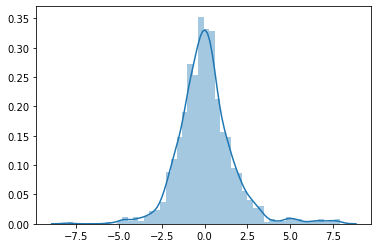

In [29]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

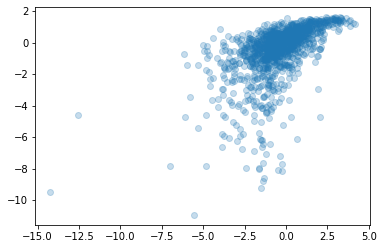

In [30]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)

#### 3.2. Probabilistic neural network predicting log profitability

In [32]:
from tensorflow_probability import layers as tfpl
from tensorflow_probability import distributions as tfd

In [33]:
model3 = tfk.Sequential([
    tfpl.DenseFlipout(32, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(1, activation='relu'),
    tfpl.DistributionLambda(make_distribution_fn=lambda t: tfd.Normal(
          loc=t, scale=1e-7 + tf.math.softplus(0.02 * t),
      ))
])

model3.compile(optimizer=tf.optimizers.Adam(1e-3), loss=tfk.losses.KLDivergence(), metrics=[])
model3.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=150, 
          epochs=500, workers=10, use_multiprocessing=True)

Instructions for updating:
Please use `layer.add_weight` method instead.
Train on 1897 samples, validate on 475 samples
Epoch 1/500
1897/1897 [==============================] - 1s 444us/sample - loss: 2025.4594 - val_loss: 2019.6694
Epoch 2/500
1897/1897 [==============================] - 0s 25us/sample - loss: 2014.4961 - val_loss: 2008.6913
Epoch 3/500
1897/1897 [==============================] - 0s 27us/sample - loss: 2003.8325 - val_loss: 1997.8587
Epoch 4/500
1897/1897 [==============================] - 0s 24us/sample - loss: 1993.2183 - val_loss: 1987.2747
Epoch 5/500
1897/1897 [==============================] - 0s 22us/sample - loss: 1982.5898 - val_loss: 1976.9574
Epoch 6/500
1897/1897 [==============================] - 0s 21us/sample - loss: 1971.9749 - val_loss: 1966.4914
Epoch 7/500
1897/1897 [==============================] - 0s 23us/sample - loss: 1961.5765 - val_loss: 1956.0254
Epoch 8/500
1897/1897 [==============================] - 0s 21us/sample - loss: 1951.2915 - val

1897/1897 [==============================] - 0s 24us/sample - loss: 1340.3622 - val_loss: 1335.1221
Epoch 71/500
1897/1897 [==============================] - 0s 25us/sample - loss: 1330.8723 - val_loss: 1325.6129
Epoch 72/500
1897/1897 [==============================] - 0s 24us/sample - loss: 1321.4046 - val_loss: 1316.1855
Epoch 73/500
1897/1897 [==============================] - 0s 23us/sample - loss: 1311.9360 - val_loss: 1306.7383
Epoch 74/500
1897/1897 [==============================] - 0s 20us/sample - loss: 1302.5177 - val_loss: 1297.2795
Epoch 75/500
1897/1897 [==============================] - 0s 25us/sample - loss: 1293.0693 - val_loss: 1287.8787
Epoch 76/500
1897/1897 [==============================] - 0s 21us/sample - loss: 1283.7021 - val_loss: 1278.6175
Epoch 77/500
1897/1897 [==============================] - 0s 21us/sample - loss: 1274.2740 - val_loss: 1269.1289
Epoch 78/500
1897/1897 [==============================] - 0s 22us/sample - loss: 1264.9128 - val_loss: 1259.7

Epoch 143/500
1897/1897 [==============================] - 0s 26us/sample - loss: 701.0627 - val_loss: 696.7616
Epoch 144/500
1897/1897 [==============================] - 0s 26us/sample - loss: 693.2879 - val_loss: 689.0159
Epoch 145/500
1897/1897 [==============================] - 0s 24us/sample - loss: 685.5589 - val_loss: 681.2979
Epoch 146/500
1897/1897 [==============================] - 0s 25us/sample - loss: 677.8473 - val_loss: 673.6252
Epoch 147/500
1897/1897 [==============================] - 0s 23us/sample - loss: 670.1946 - val_loss: 665.9762
Epoch 148/500
1897/1897 [==============================] - 0s 24us/sample - loss: 662.5561 - val_loss: 658.3677
Epoch 149/500
1897/1897 [==============================] - 0s 22us/sample - loss: 654.9739 - val_loss: 650.8154
Epoch 150/500
1897/1897 [==============================] - 0s 22us/sample - loss: 647.4119 - val_loss: 643.2602
Epoch 151/500
1897/1897 [==============================] - 0s 24us/sample - loss: 639.8943 - val_loss: 6

1897/1897 [==============================] - 0s 22us/sample - loss: 243.4162 - val_loss: 240.9241
Epoch 217/500
1897/1897 [==============================] - 0s 26us/sample - loss: 238.9059 - val_loss: 236.4424
Epoch 218/500
1897/1897 [==============================] - 0s 24us/sample - loss: 234.4477 - val_loss: 232.0113
Epoch 219/500
1897/1897 [==============================] - 0s 24us/sample - loss: 230.0462 - val_loss: 227.6317
Epoch 220/500
1897/1897 [==============================] - 0s 20us/sample - loss: 225.6901 - val_loss: 223.3031
Epoch 221/500
1897/1897 [==============================] - 0s 28us/sample - loss: 221.3767 - val_loss: 219.0287
Epoch 222/500
1897/1897 [==============================] - 0s 23us/sample - loss: 217.1372 - val_loss: 214.7996
Epoch 223/500
1897/1897 [==============================] - 0s 24us/sample - loss: 212.9194 - val_loss: 210.6255
Epoch 224/500
1897/1897 [==============================] - 0s 23us/sample - loss: 208.7673 - val_loss: 206.5009
Epoch 

Epoch 290/500
1897/1897 [==============================] - 0s 23us/sample - loss: 38.6774 - val_loss: 37.9931
Epoch 291/500
1897/1897 [==============================] - 0s 21us/sample - loss: 37.4398 - val_loss: 36.7724
Epoch 292/500
1897/1897 [==============================] - 0s 23us/sample - loss: 36.2328 - val_loss: 35.5843
Epoch 293/500
1897/1897 [==============================] - 0s 23us/sample - loss: 35.0559 - val_loss: 34.4218
Epoch 294/500
1897/1897 [==============================] - 0s 22us/sample - loss: 33.9096 - val_loss: 33.2910
Epoch 295/500
1897/1897 [==============================] - 0s 24us/sample - loss: 32.7951 - val_loss: 32.1891
Epoch 296/500
1897/1897 [==============================] - 0s 23us/sample - loss: 31.7023 - val_loss: 31.1158
Epoch 297/500
1897/1897 [==============================] - 0s 24us/sample - loss: 30.6414 - val_loss: 30.0706
Epoch 298/500
1897/1897 [==============================] - 0s 24us/sample - loss: 29.6085 - val_loss: 29.0529
Epoch 299/

1897/1897 [==============================] - 0s 26us/sample - loss: 1.4321 - val_loss: 1.3888
Epoch 366/500
1897/1897 [==============================] - 0s 23us/sample - loss: 1.3490 - val_loss: 1.3079
Epoch 367/500
1897/1897 [==============================] - 0s 20us/sample - loss: 1.2698 - val_loss: 1.2309
Epoch 368/500
1897/1897 [==============================] - 0s 22us/sample - loss: 1.1945 - val_loss: 1.1576
Epoch 369/500
1897/1897 [==============================] - 0s 20us/sample - loss: 1.1229 - val_loss: 1.0880
Epoch 370/500
1897/1897 [==============================] - 0s 26us/sample - loss: 1.0548 - val_loss: 1.0217
Epoch 371/500
1897/1897 [==============================] - 0s 25us/sample - loss: 0.9901 - val_loss: 0.9588
Epoch 372/500
1897/1897 [==============================] - 0s 27us/sample - loss: 0.9286 - val_loss: 0.8990
Epoch 373/500
1897/1897 [==============================] - 0s 25us/sample - loss: 0.8703 - val_loss: 0.8423
Epoch 374/500
1897/1897 [=================

1897/1897 [==============================] - 0s 26us/sample - loss: -0.0873 - val_loss: -0.0845
Epoch 441/500
1897/1897 [==============================] - 0s 25us/sample - loss: -0.0879 - val_loss: -0.0850
Epoch 442/500
1897/1897 [==============================] - 0s 24us/sample - loss: -0.0884 - val_loss: -0.0855
Epoch 443/500
1897/1897 [==============================] - 0s 24us/sample - loss: -0.0889 - val_loss: -0.0860
Epoch 444/500
1897/1897 [==============================] - 0s 21us/sample - loss: -0.0893 - val_loss: -0.0864
Epoch 445/500
1897/1897 [==============================] - 0s 23us/sample - loss: -0.0897 - val_loss: -0.0868
Epoch 446/500
1897/1897 [==============================] - 0s 20us/sample - loss: -0.0894 - val_loss: -0.0872
Epoch 447/500
1897/1897 [==============================] - 0s 23us/sample - loss: -0.0905 - val_loss: -0.0875
Epoch 448/500
1897/1897 [==============================] - 0s 21us/sample - loss: -0.0908 - val_loss: -0.0878
Epoch 449/500
1897/1897 

In [34]:
preds3 = model3.predict(X_test).flatten()

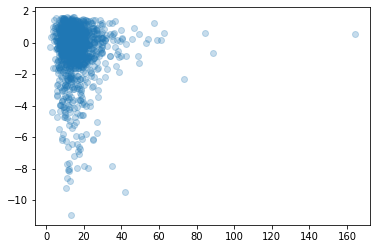

In [35]:
plt.scatter(preds3, np.array(y_test).flatten(), alpha=0.25)

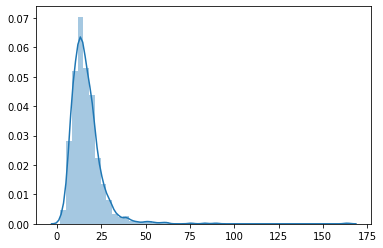

In [36]:
errors3 = preds3 - np.array(y_test).flatten()
sns.distplot(errors3)

#### 3.3 Traditional network with a classification problem instead

In [37]:
def classify_ratio(ratio):
    if ratio < 1:
        return 0
    elif (ratio >= 1) and (ratio < 2):
        return 1
    else:
        return 2

In [38]:
df_cut["profitability_class"] = df_cut["profitability"].apply(lambda x : classify_ratio(x))
y3 = df_cut["profitability_class"].values

y3_encoded = tfk.utils.to_categorical(y3)

X_train, X_test, y_train, y_test = train_test_split(normed_X_cut, y3_encoded, test_size=0.33, random_state=42)

/home/hienle/.virtualenvs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


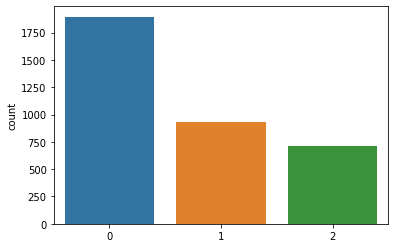

In [39]:
sns.countplot(y3)

In [65]:
from tensorflow.keras import backend as K

THRESHOLD = 0.5
def recall(y_true, y_pred, threshold_shift=0.5-THRESHOLD):

    # just in case 
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fn = K.sum(K.round(K.clip(y_true - y_pred_bin, 0, 1)))

    recall = tp / (tp + fn)
    return recall


model4 = tfk.Sequential([
#     tfkl.Dense(128, activation="sigmoid"),
#     tfkl.Dense(64, activation="sigmoid"),
    tfkl.Dense(32, activation="sigmoid"),
    tfkl.Dense(3, activation="softmax")
])

model4.compile(optimizer=tfk.optimizers.Adam(1e-2),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy', recall])
model4.fit(np.array(X_train), np.array(y_train), validation_split=0.33, 
           epochs=600, batch_size=128, use_multiprocessing=True, workers=10)

Train on 1589 samples, validate on 783 samples
Epoch 1/600
1589/1589 [==============================] - 0s 276us/sample - loss: 1.0276 - accuracy: 0.4965 - recall: 0.3416 - val_loss: 1.0191 - val_accuracy: 0.5262 - val_recall: 0.4494
Epoch 2/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.9833 - accuracy: 0.5450 - recall: 0.3545 - val_loss: 0.9744 - val_accuracy: 0.5249 - val_recall: 0.4131
Epoch 3/600
1589/1589 [==============================] - 0s 28us/sample - loss: 0.9674 - accuracy: 0.5481 - recall: 0.4445 - val_loss: 0.9723 - val_accuracy: 0.5300 - val_recall: 0.3891
Epoch 4/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.9597 - accuracy: 0.5576 - recall: 0.4047 - val_loss: 0.9676 - val_accuracy: 0.5364 - val_recall: 0.3986
Epoch 5/600
1589/1589 [==============================] - 0s 29us/sample - loss: 0.9553 - accuracy: 0.5588 - recall: 0.4213 - val_loss: 0.9690 - val_accuracy: 0.5300 - val_recall: 0.4298
Epoch 6/600
1589/1589 

1589/1589 [==============================] - 0s 28us/sample - loss: 0.7809 - accuracy: 0.6495 - recall: 0.5303 - val_loss: 0.8978 - val_accuracy: 0.5824 - val_recall: 0.4472
Epoch 45/600
1589/1589 [==============================] - 0s 30us/sample - loss: 0.7711 - accuracy: 0.6690 - recall: 0.5384 - val_loss: 0.9110 - val_accuracy: 0.5760 - val_recall: 0.4857
Epoch 46/600
1589/1589 [==============================] - 0s 27us/sample - loss: 0.7660 - accuracy: 0.6589 - recall: 0.5530 - val_loss: 0.8960 - val_accuracy: 0.5811 - val_recall: 0.4696
Epoch 47/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.7679 - accuracy: 0.6576 - recall: 0.5526 - val_loss: 0.8964 - val_accuracy: 0.5900 - val_recall: 0.4467
Epoch 48/600
1589/1589 [==============================] - 0s 31us/sample - loss: 0.7531 - accuracy: 0.6759 - recall: 0.5484 - val_loss: 0.9029 - val_accuracy: 0.5862 - val_recall: 0.4897
Epoch 49/600
1589/1589 [==============================] - 0s 26us/sample - los

Epoch 88/600
1589/1589 [==============================] - 0s 28us/sample - loss: 0.5338 - accuracy: 0.8074 - recall: 0.7214 - val_loss: 0.8737 - val_accuracy: 0.6028 - val_recall: 0.5136
Epoch 89/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.5307 - accuracy: 0.8156 - recall: 0.7230 - val_loss: 0.8786 - val_accuracy: 0.6143 - val_recall: 0.5214
Epoch 90/600
1589/1589 [==============================] - 0s 25us/sample - loss: 0.5191 - accuracy: 0.8143 - recall: 0.7317 - val_loss: 0.8734 - val_accuracy: 0.6181 - val_recall: 0.5259
Epoch 91/600
1589/1589 [==============================] - 0s 28us/sample - loss: 0.5200 - accuracy: 0.8156 - recall: 0.7310 - val_loss: 0.8719 - val_accuracy: 0.6130 - val_recall: 0.5176
Epoch 92/600
1589/1589 [==============================] - 0s 27us/sample - loss: 0.5190 - accuracy: 0.8037 - recall: 0.7340 - val_loss: 0.8739 - val_accuracy: 0.6117 - val_recall: 0.5332
Epoch 93/600
1589/1589 [==============================] - 0s 27us

Epoch 132/600
1589/1589 [==============================] - 0s 28us/sample - loss: 0.3745 - accuracy: 0.8779 - recall: 0.8246 - val_loss: 0.8482 - val_accuracy: 0.6258 - val_recall: 0.5700
Epoch 133/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.3741 - accuracy: 0.8760 - recall: 0.8355 - val_loss: 0.8560 - val_accuracy: 0.6450 - val_recall: 0.5868
Epoch 134/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.3628 - accuracy: 0.8842 - recall: 0.8464 - val_loss: 0.8510 - val_accuracy: 0.6411 - val_recall: 0.5985
Epoch 135/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.3592 - accuracy: 0.8930 - recall: 0.8513 - val_loss: 0.8422 - val_accuracy: 0.6398 - val_recall: 0.5801
Epoch 136/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.3565 - accuracy: 0.8836 - recall: 0.8521 - val_loss: 0.8376 - val_accuracy: 0.6488 - val_recall: 0.5812
Epoch 137/600
1589/1589 [==============================] - 0

1589/1589 [==============================] - 0s 27us/sample - loss: 0.2726 - accuracy: 0.9257 - recall: 0.8999 - val_loss: 0.8251 - val_accuracy: 0.6641 - val_recall: 0.6147
Epoch 176/600
1589/1589 [==============================] - 0s 30us/sample - loss: 0.2700 - accuracy: 0.9289 - recall: 0.9088 - val_loss: 0.8386 - val_accuracy: 0.6552 - val_recall: 0.6091
Epoch 177/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.2656 - accuracy: 0.9327 - recall: 0.9086 - val_loss: 0.8229 - val_accuracy: 0.6667 - val_recall: 0.6202
Epoch 178/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.2620 - accuracy: 0.9320 - recall: 0.9131 - val_loss: 0.8286 - val_accuracy: 0.6718 - val_recall: 0.6225
Epoch 179/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.2610 - accuracy: 0.9383 - recall: 0.9122 - val_loss: 0.8222 - val_accuracy: 0.6769 - val_recall: 0.6253
Epoch 180/600
1589/1589 [==============================] - 0s 22us/sample 

Epoch 219/600
1589/1589 [==============================] - 0s 27us/sample - loss: 0.2080 - accuracy: 0.9497 - recall: 0.9370 - val_loss: 0.7987 - val_accuracy: 0.6884 - val_recall: 0.6543
Epoch 220/600
1589/1589 [==============================] - 0s 25us/sample - loss: 0.2027 - accuracy: 0.9553 - recall: 0.9390 - val_loss: 0.8139 - val_accuracy: 0.6935 - val_recall: 0.6717
Epoch 221/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.2011 - accuracy: 0.9547 - recall: 0.9412 - val_loss: 0.8043 - val_accuracy: 0.6833 - val_recall: 0.6443
Epoch 222/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.1976 - accuracy: 0.9572 - recall: 0.9434 - val_loss: 0.8136 - val_accuracy: 0.6833 - val_recall: 0.6432
Epoch 223/600
1589/1589 [==============================] - 0s 25us/sample - loss: 0.2009 - accuracy: 0.9572 - recall: 0.9412 - val_loss: 0.8002 - val_accuracy: 0.6743 - val_recall: 0.6454
Epoch 224/600
1589/1589 [==============================] - 0

1589/1589 [==============================] - 0s 23us/sample - loss: 0.1559 - accuracy: 0.9711 - recall: 0.9664 - val_loss: 0.8149 - val_accuracy: 0.6973 - val_recall: 0.6750
Epoch 263/600
1589/1589 [==============================] - 0s 21us/sample - loss: 0.1507 - accuracy: 0.9755 - recall: 0.9697 - val_loss: 0.8395 - val_accuracy: 0.6922 - val_recall: 0.6577
Epoch 264/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.1551 - accuracy: 0.9736 - recall: 0.9655 - val_loss: 0.8481 - val_accuracy: 0.6948 - val_recall: 0.6588
Epoch 265/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.1524 - accuracy: 0.9717 - recall: 0.9658 - val_loss: 0.8268 - val_accuracy: 0.6935 - val_recall: 0.6621
Epoch 266/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.1475 - accuracy: 0.9761 - recall: 0.9700 - val_loss: 0.8258 - val_accuracy: 0.6999 - val_recall: 0.6772
Epoch 267/600
1589/1589 [==============================] - 0s 21us/sample 

Epoch 306/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.1176 - accuracy: 0.9855 - recall: 0.9815 - val_loss: 0.8285 - val_accuracy: 0.6935 - val_recall: 0.6688
Epoch 307/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.1139 - accuracy: 0.9830 - recall: 0.9759 - val_loss: 0.8438 - val_accuracy: 0.6948 - val_recall: 0.6772
Epoch 308/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.1118 - accuracy: 0.9868 - recall: 0.9818 - val_loss: 0.8509 - val_accuracy: 0.6909 - val_recall: 0.6621
Epoch 309/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.1128 - accuracy: 0.9893 - recall: 0.9823 - val_loss: 0.8434 - val_accuracy: 0.6999 - val_recall: 0.6666
Epoch 310/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.1103 - accuracy: 0.9880 - recall: 0.9862 - val_loss: 0.8492 - val_accuracy: 0.6948 - val_recall: 0.6761
Epoch 311/600
1589/1589 [==============================] - 0

1589/1589 [==============================] - 0s 23us/sample - loss: 0.0856 - accuracy: 0.9943 - recall: 0.9895 - val_loss: 0.8480 - val_accuracy: 0.6973 - val_recall: 0.6783
Epoch 350/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.0853 - accuracy: 0.9918 - recall: 0.9877 - val_loss: 0.8349 - val_accuracy: 0.7088 - val_recall: 0.6917
Epoch 351/600
1589/1589 [==============================] - 0s 28us/sample - loss: 0.0863 - accuracy: 0.9937 - recall: 0.9934 - val_loss: 0.8430 - val_accuracy: 0.7088 - val_recall: 0.6873
Epoch 352/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.0837 - accuracy: 0.9975 - recall: 0.9934 - val_loss: 0.8508 - val_accuracy: 0.6973 - val_recall: 0.6828
Epoch 353/600
1589/1589 [==============================] - 0s 26us/sample - loss: 0.0835 - accuracy: 0.9956 - recall: 0.9925 - val_loss: 0.8577 - val_accuracy: 0.7063 - val_recall: 0.6895
Epoch 354/600
1589/1589 [==============================] - 0s 24us/sample 

Epoch 393/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0672 - accuracy: 0.9962 - recall: 0.9937 - val_loss: 0.8791 - val_accuracy: 0.7063 - val_recall: 0.6895
Epoch 394/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0672 - accuracy: 0.9924 - recall: 0.9911 - val_loss: 0.9000 - val_accuracy: 0.7063 - val_recall: 0.6957
Epoch 395/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0660 - accuracy: 0.9956 - recall: 0.9952 - val_loss: 0.8884 - val_accuracy: 0.7050 - val_recall: 0.6895
Epoch 396/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0654 - accuracy: 0.9956 - recall: 0.9958 - val_loss: 0.8754 - val_accuracy: 0.7075 - val_recall: 0.6906
Epoch 397/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0660 - accuracy: 0.9962 - recall: 0.9958 - val_loss: 0.8964 - val_accuracy: 0.7088 - val_recall: 0.7001
Epoch 398/600
1589/1589 [==============================] - 0

1589/1589 [==============================] - 0s 23us/sample - loss: 0.0517 - accuracy: 0.9962 - recall: 0.9964 - val_loss: 0.8916 - val_accuracy: 0.7088 - val_recall: 0.6906
Epoch 437/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0532 - accuracy: 0.9969 - recall: 0.9970 - val_loss: 0.9091 - val_accuracy: 0.7216 - val_recall: 0.7102
Epoch 438/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0517 - accuracy: 0.9969 - recall: 0.9970 - val_loss: 0.9275 - val_accuracy: 0.7139 - val_recall: 0.7035
Epoch 439/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0524 - accuracy: 0.9969 - recall: 0.9970 - val_loss: 0.9272 - val_accuracy: 0.7165 - val_recall: 0.7153
Epoch 440/600
1589/1589 [==============================] - 0s 24us/sample - loss: 0.0525 - accuracy: 0.9969 - recall: 0.9964 - val_loss: 0.9211 - val_accuracy: 0.7203 - val_recall: 0.7068
Epoch 441/600
1589/1589 [==============================] - 0s 23us/sample 

Epoch 480/600
1589/1589 [==============================] - 0s 25us/sample - loss: 0.0395 - accuracy: 0.9975 - recall: 0.9976 - val_loss: 0.9373 - val_accuracy: 0.7216 - val_recall: 0.7029
Epoch 481/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0399 - accuracy: 0.9994 - recall: 0.9994 - val_loss: 0.9281 - val_accuracy: 0.7254 - val_recall: 0.7040
Epoch 482/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0423 - accuracy: 0.9975 - recall: 0.9976 - val_loss: 0.9041 - val_accuracy: 0.7292 - val_recall: 0.7085
Epoch 483/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0403 - accuracy: 0.9981 - recall: 0.9982 - val_loss: 0.9101 - val_accuracy: 0.7229 - val_recall: 0.7051
Epoch 484/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0427 - accuracy: 0.9981 - recall: 0.9982 - val_loss: 0.9229 - val_accuracy: 0.7229 - val_recall: 0.7040
Epoch 485/600
1589/1589 [==============================] - 0

1589/1589 [==============================] - 0s 24us/sample - loss: 0.0342 - accuracy: 0.9994 - recall: 0.9994 - val_loss: 0.9660 - val_accuracy: 0.7254 - val_recall: 0.7158
Epoch 524/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0335 - accuracy: 0.9975 - recall: 0.9976 - val_loss: 0.9717 - val_accuracy: 0.7190 - val_recall: 0.7007
Epoch 525/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0346 - accuracy: 0.9981 - recall: 0.9973 - val_loss: 0.9838 - val_accuracy: 0.7267 - val_recall: 0.7158
Epoch 526/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0315 - accuracy: 0.9994 - recall: 0.9994 - val_loss: 0.9656 - val_accuracy: 0.7229 - val_recall: 0.7063
Epoch 527/600
1589/1589 [==============================] - 0s 21us/sample - loss: 0.0308 - accuracy: 0.9987 - recall: 0.9988 - val_loss: 0.9623 - val_accuracy: 0.7254 - val_recall: 0.7147
Epoch 528/600
1589/1589 [==============================] - 0s 22us/sample 

Epoch 567/600
1589/1589 [==============================] - 0s 25us/sample - loss: 0.0237 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.9977 - val_accuracy: 0.7331 - val_recall: 0.7214
Epoch 568/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0237 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.9955 - val_accuracy: 0.7369 - val_recall: 0.7247
Epoch 569/600
1589/1589 [==============================] - 0s 23us/sample - loss: 0.0238 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.9850 - val_accuracy: 0.7369 - val_recall: 0.7236
Epoch 570/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0238 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 1.0175 - val_accuracy: 0.7292 - val_recall: 0.7180
Epoch 571/600
1589/1589 [==============================] - 0s 22us/sample - loss: 0.0268 - accuracy: 0.9981 - recall: 0.9982 - val_loss: 1.0017 - val_accuracy: 0.7280 - val_recall: 0.7202
Epoch 572/600
1589/1589 [==============================] - 0

In [67]:
model4.evaluate(X_test, y_test, verbose=2)

1169/1169 - 0s - loss: 0.9162 - accuracy: 0.7707 - recall: 0.7664


[0.916170412551857, 0.7707442, 0.76644474]

In [68]:
preds4 = model4.predict(np.array(X_test))

In [69]:
preds4 # each row represents the probablities that this instance falls into one of the 3 classes 

array([[1.35818645e-08, 1.63306098e-03, 9.98366892e-01],
       [7.03748739e-08, 3.74262541e-04, 9.99625683e-01],
       [9.99975801e-01, 2.42174210e-05, 7.36159452e-13],
       ...,
       [9.90322053e-01, 9.66207031e-03, 1.59746960e-05],
       [3.30435624e-03, 9.62254643e-01, 3.44410017e-02],
       [9.99919057e-01, 8.09373014e-05, 4.70632422e-08]], dtype=float32)

In [70]:
preds4_concrete = np.argmax(preds4, axis=1)
preds4_concrete

array([2, 2, 0, ..., 0, 1, 0])

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(preds4_concrete, np.argmax(y_test, 1))

array([[549, 115,   8],
       [ 74, 173,  50],
       [  4,  17, 179]])